# Module 7- Assignment: GDP Analysis

In [25]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [26]:
import warnings
warnings.filterwarnings('ignore') # Ignored so that output match doesn't fail
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part I-A
For the analysis below, use the Data I-A.

#### First, you need to load the data in Python properly and then clean it. This also involves the treatment of missing values, you can choose to drop the row or column as well. Remember this will affect your next analysis and results drastically.

In [27]:
GSDP_DATA=pd.read_csv("./data1.csv") # Reading file/ Loading data
GSDP_DATA.set_index('Duration',inplace = True) # Set index to "Duration"
GSDP_DATA.drop('2016-17',inplace=True)  # Remove the rows for the year 2016-17.

#### Plot a graph for rows " % Growth over previous year" for all the states (not union territories) whose data is available, use as much data as possible for this exercise. Use the best fit line to represent the growth for each state. Draw a similar line graph for the nation as well.

In [28]:
def trendline(xd, yd, state, c='--r', alpha=1):
    """Make a line of best fit"""
    
    if not len(xd) or not len(yd) or len(xd)!=len(yd):
        plt.gca()
        plt.show()
        return 'no slope'
    #Calculate trendline
    coeffs = np.polyfit(xd, yd, 1)

    intercept = coeffs[-1]
    slope = coeffs[-2]

    mind = np.min(xd)
    maxd = np.max(xd)

    xl = np.array([mind, maxd])
    yl = slope * xl + intercept
    
    plt.title(state + ' with slope ' + str(round(slope, 2)))
    #Plot trendline
    plt.plot(xl, yl, c, alpha=alpha)

    #Calculate R Squared
    p = np.poly1d(coeffs)

    ybar = np.sum(yd) / len(yd)
    ssreg = np.sum((p(xd) - ybar) ** 2)
    sstot = np.sum((yd - ybar) ** 2)
    Rsqr = ssreg / sstot
    plt.show()
    return slope

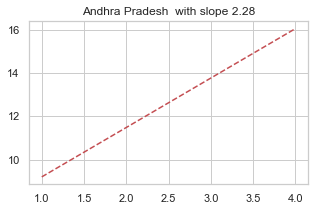

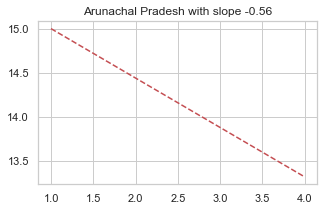

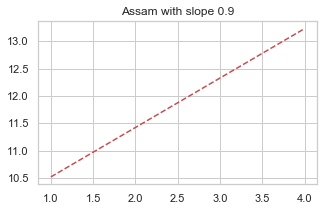

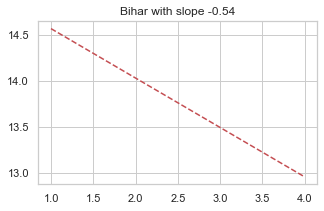

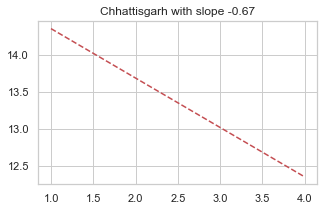

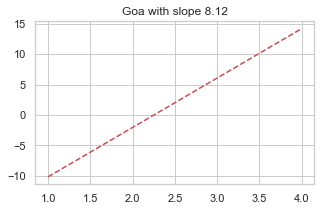

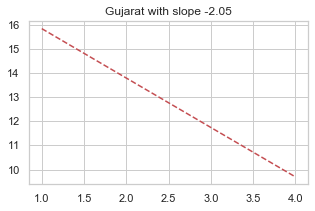

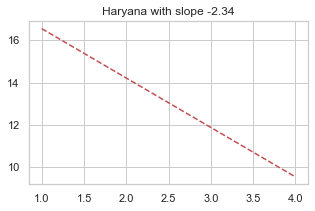

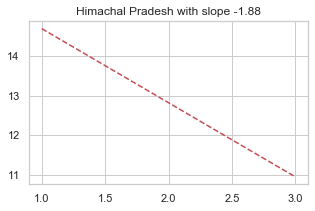

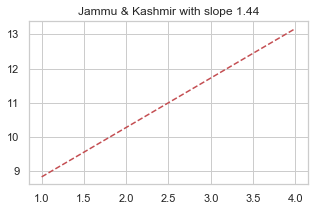

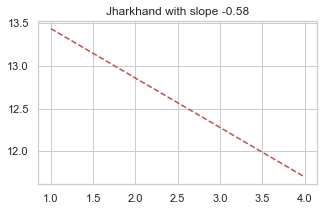

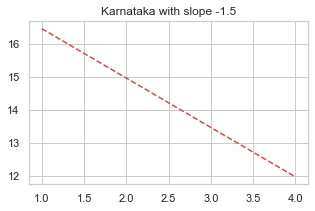

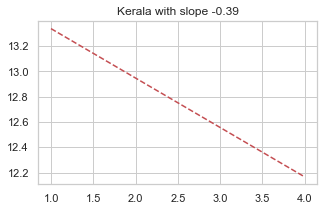

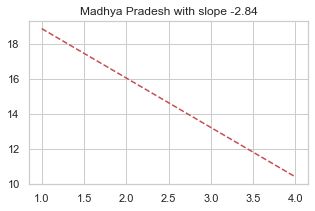

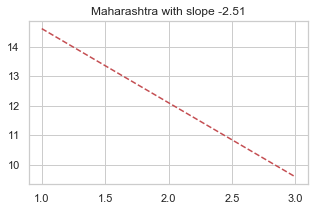

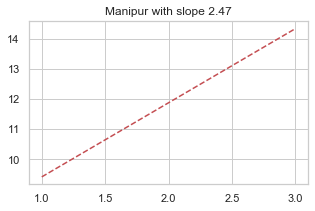

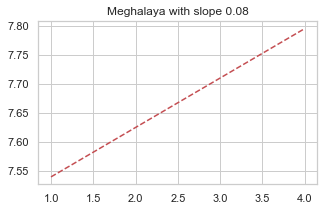

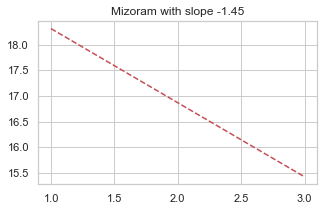

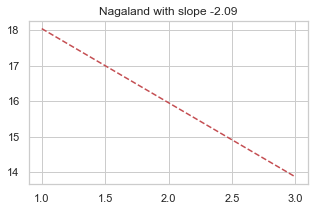

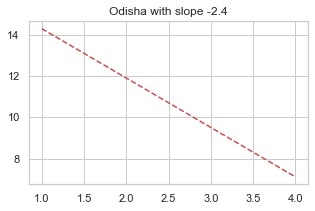

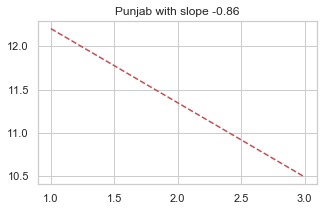

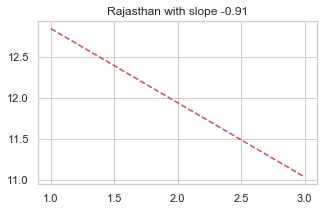

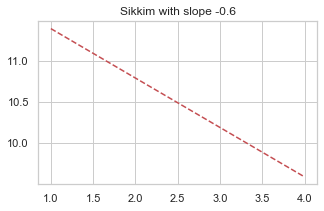

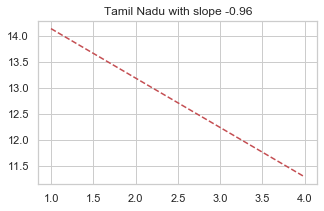

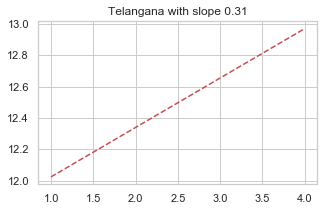

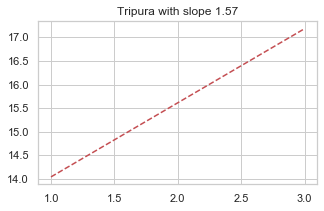

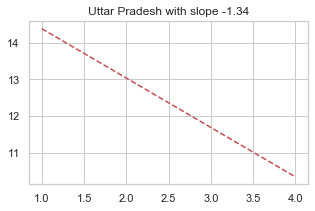

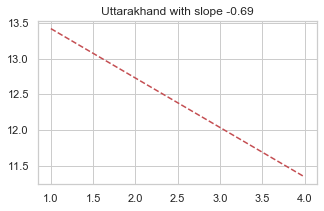

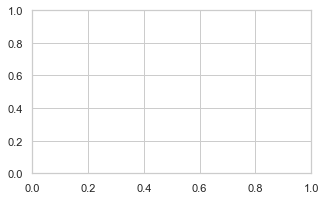

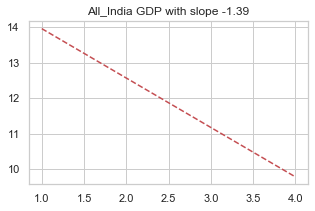

In [29]:
# This dataframe will be used only for this part of question
GSDP_DATA_StatesOnly = GSDP_DATA.copy() # copy dataframe by value so that actual dataframe is not changed (might be used for future questions)

Not_States= ['Items  Description', 'Andaman & Nicobar Islands', 'Chandigarh', 'Delhi', 'Puducherry'] # All column that donot represent state
slopes = {} # slopes of growth graph for all states
averageGrowthRate = {}
plt.rcParams["figure.figsize"] = (5,3)
for state in GSDP_DATA_StatesOnly:
    if state not in Not_States :
        y= list(GSDP_DATA_StatesOnly[state])[-4:]  # Getting data for (% Growth over previous year)
        y = [x for x in y if str(x) != 'nan'] # Removing nan values
        x = []
        
        # if  there is no data in y to plot then leave x and y empty for empty plot, else fill x 
        if not len(y):
            y = []
            x = []
            averageGrowthRate[state] = 0
        else:
            x = range(1, len(y) + 1)
            averageGrowthRate[state] = sum(y)/len(y)
        stateSlope = trendline(x, y, state)  # Making Plot
        if stateSlope!= 'no slope':
            slopes[state] = stateSlope

In [30]:
# Which states have been growing consistently fast, and which ones have been struggling? Rank top 3 fastest and 3 slowest-growing states.
homeStateGrowthRate = slopes['Punjab']
slopes = sorted(slopes.items(), key=lambda keyValue: keyValue[1])
fastest3list = slopes[-3:] # 3 fastest growing states
slowest3list = slopes[:3]
fastest3 = []
slowest3 = []
for i in fastest3list:
    fastest3.append(i[0])
for i in slowest3list:
    slowest3.append(i[0])
fastest3.reverse()

print('Fastest 3 :', end = ' ')
print(fastest3)
print('Slowest 3 :', end = ' ')
print(slowest3)

Fastest 3 : ['Goa', 'Manipur', 'Andhra Pradesh ']
Slowest 3 : ['Madhya Pradesh', 'Maharashtra', 'Odisha']


#### How will you compare the growth rates of any two states?
We can compare growth rates of any two states by comparing slope of best fit line. more the slope, greater is the growth rate

#### Which states have been growing consistently fast, and which ones have been struggling? Rank top 3 fastest and 3 slowest-growing states.
##### Fastest 3 : 
Goa > Manipur > Andhra Pradesh 
##### Slowest 3 : 
Madhya Pradesh < Maharashtra < Odisha

In [31]:
# What is the Nation's growth rate?
growthRateIndia = list(GSDP_DATA_StatesOnly['All_India GDP'])[-4:]
avgGrowthRateIndia = sum(growthRateIndia)/len(growthRateIndia)
print('Average growth rate for India : ', end = ' ')
print(avgGrowthRateIndia)

Average growth rate for India :  11.8675


#### What is the Nation's growth rate?
Average Growth Rate for India is 11.8675 as calculated above

#### What has been the growth rate of your home state, and how does it compare to the national growth rate?
Choosing Punjab as home state (Actual is Chandigarh)
Punjab has negative growth rate while India has positive. So India's growth rate is more than Punjab

## Plot the total GDP of the states for the year 2015-16

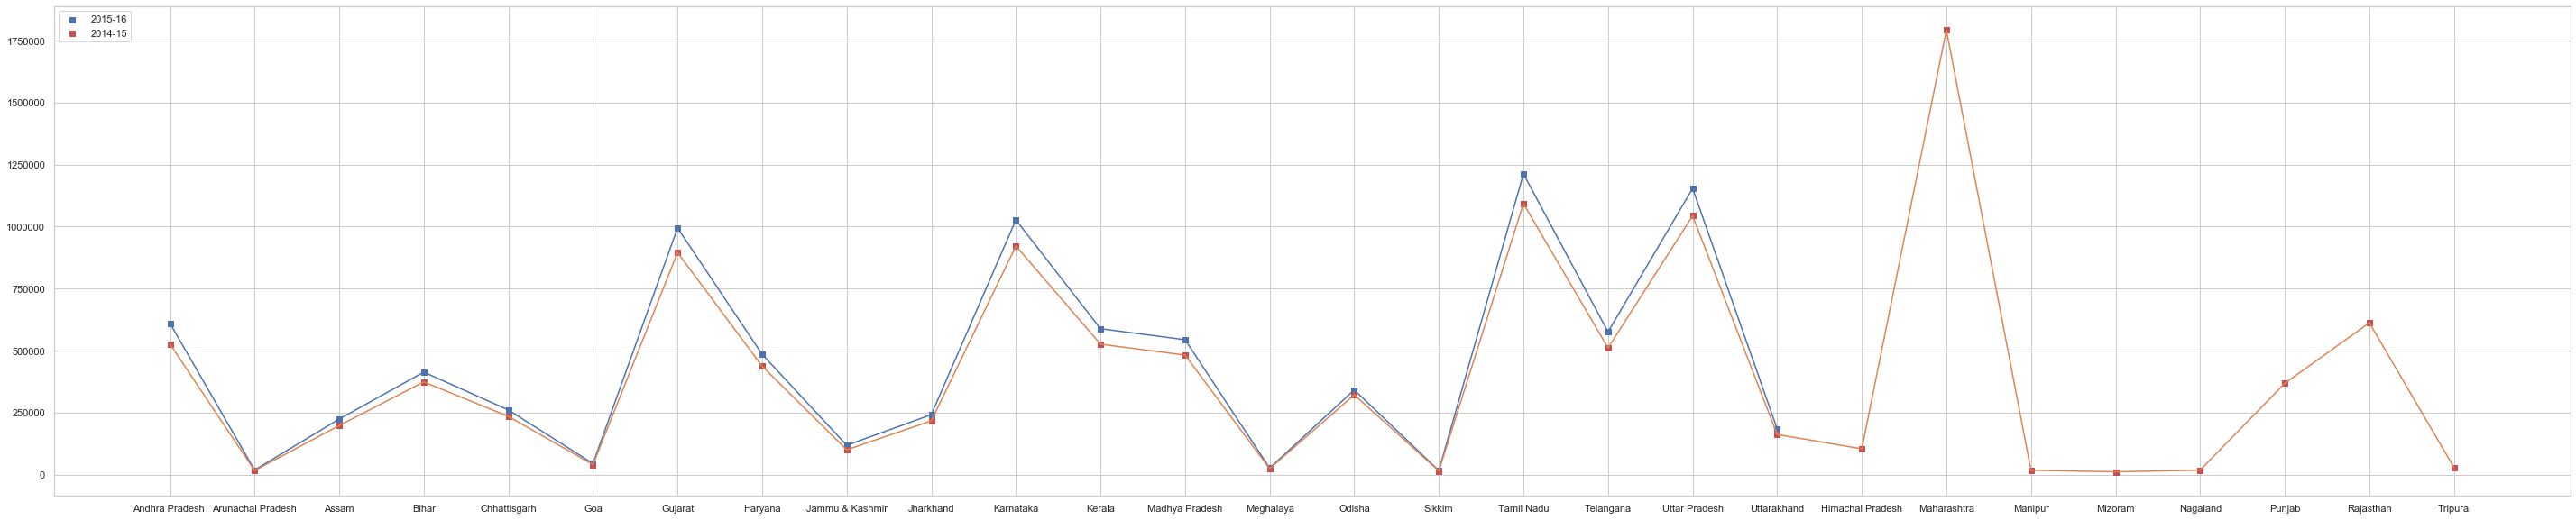

In [32]:
import math
Not_States= ['Items  Description', 'Andaman & Nicobar Islands', 'Chandigarh', 'Delhi', 'Puducherry', 'All_India GDP'] # All column that donot represent state
growth2015_16 = {}
growth2014_15 = {}
temp2014_15 = {}
for state in GSDP_DATA:
    if state not in Not_States :
        temp14_15 = list(GSDP_DATA[state])[3]
        temp = list(GSDP_DATA[state])[4]
        if not math.isnan(temp):
            growth2015_16[state] = temp
        if not math.isnan(temp14_15):
            # to make graph beatiful all values not in 2015-16 will be apended at last
            if not math.isnan(temp):
                growth2014_15[state] = temp14_15
            else:
                temp2014_15[state] = temp14_15
for i in temp2014_15:
    growth2014_15[i] = temp2014_15[i]
x = list(growth2015_16.keys())
y = list(growth2015_16.values())
x14_15 = list(growth2014_15.keys())
y14_15 = list(growth2014_15.values())

plt.rcParams["figure.figsize"] = (50,10)
plt.scatter(x, y, c='b', marker='s', label='2015-16')
plt.scatter(x14_15, y14_15, c='r', marker='s', label='2014-15')
plt.plot(x, y)
plt.plot(x14_15, y14_15)
plt.legend(loc='upper left')
plt.show()

# plt.scatter(x, y14_15)
# plt.plot(x, y14_15)
# plt.show()

#### Identify the top 5 and the bottom 5 states based on total GDP.

In [33]:
sortedGrowth15_16 = sorted(growth2015_16.items(), key=lambda keyValue: keyValue[1])
sortedGrowth15_16

[('Sikkim', 16637.0),
 ('Arunachal Pradesh', 18784.0),
 ('Meghalaya', 26745.0),
 ('Goa', 45002.0),
 ('Jammu & Kashmir', 118387.0),
 ('Uttarakhand', 184091.0),
 ('Assam', 224234.0),
 ('Jharkhand', 241955.0),
 ('Chhattisgarh', 260776.0),
 ('Odisha', 341887.0),
 ('Bihar', 413503.0),
 ('Haryana', 485184.0),
 ('Madhya Pradesh', 543975.0),
 ('Telangana', 575631.0),
 ('Kerala', 588337.0),
 ('Andhra Pradesh ', 609934.0),
 ('Gujarat', 994316.0),
 ('Karnataka', 1027068.0),
 ('Uttar Pradesh', 1153795.0),
 ('Tamil Nadu', 1212668.0)]

#### Which Plot will you use for this? Why? (Remeber to plot the graph in a way such as it is easier to read and compare)
Scatter plot with line is plotted as its clear which state has high/low GDP from this. Its easy to analyze data points

#### Identify the top 5 and the bottom 5 states based on total GDP.
##### Top 5: 
Tamil Nadu > Uttar Pradesh > Karnataka > Gujarat > Andhra Pradesh

##### Bottom 5:
Sikkim < Arunachal Pradesh < Meghalaya < Goa < Jammu & kashmir

#### What insights can you draw from this graph? What states are performing poorly? (Remember: this will not be solely based on total GDP)
From the graph above, we can see GDP for both 2014-15 and 2015-16. It is clear that some states are not growing rapidly/ not growing at all, since there GDP is low and unchanged as well. These states are: Arunachal Pradesh, Goa, Meghalya, Sikkim, Uttarakhand. Some other states are also performing poorly but better than these states like Jammu & Kashmir


# Part I-B:

### For the analysis below, use Data I-B. You can also use Data I-B along with Data I-A if required. Also, perform the analysis only for the duration 2014-15. 

In [34]:
import glob
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
Files=glob.glob("dataFiles/*.csv")

resultFrame= pd.DataFrame()
new=pd.DataFrame()
tempFrame=pd.DataFrame()
for each in Files:
    tempFrame=resultFrame
    name=each.split('-')    #To get state name
    name = name[1]
    name=name.split('.')
    filename=name[0]
    df=pd.read_csv(each,encoding = 'unicode_escape')
    dff=df[["S.No.","Item","2014-15"]]
    dff.rename(columns={"2014-15":filename},inplace=True)
    new=dff
    resultFrame=pd.concat([tempFrame,new], axis = 1)  #Concatinate the files to single DF

Data1_B=resultFrame.loc[:,~resultFrame.columns.duplicated()] # Remove Duplicate Columns

### Filter out the union territories (Delhi, Chandigarh, Andaman and Nicobar Islands, etc.) for further analysis, as they are governed directly by the central, not state governments.

In [35]:
ignoreFiles = ['Chandigarh', 'Delhi', 'Puducherry', 'Andaman and Nicobar Islands', 'A and N Islands', 'A & N Islands']
for UT in ignoreFiles:
    if UT in Data1_B:
        Data1_B.drop(UT, inplace = True, axis = 1)
Data1_B.set_index("Item",inplace=True)

## Plot the GDP per capita for all the states

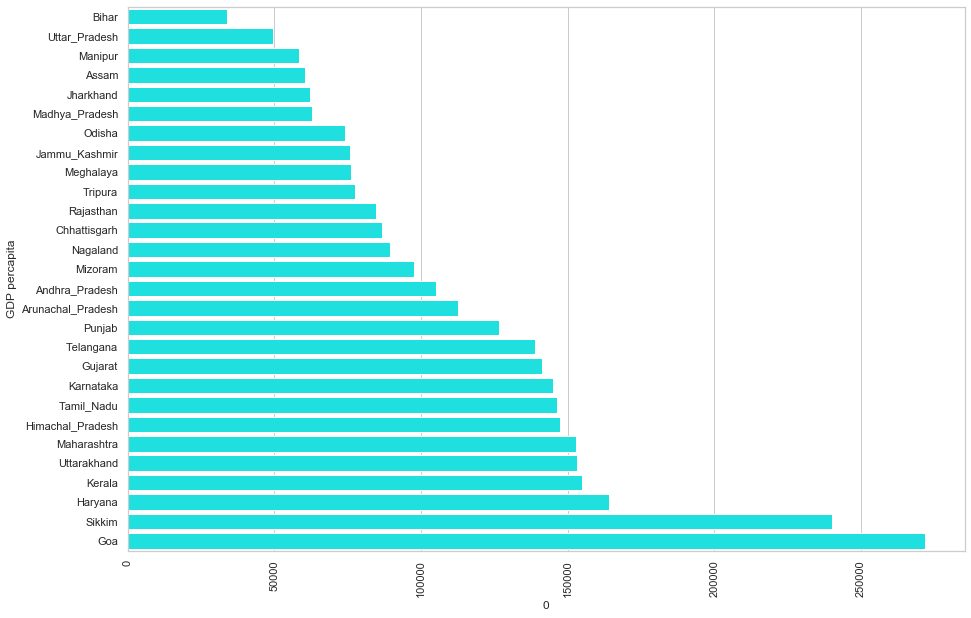

In [36]:
PerCapita=Data1_B.loc[["Per Capita GSDP (Rs.)"]]    #Select only "Per Capita GSDP " from Data1B
PerCapita.reset_index(inplace=True)
PerCapita=PerCapita.iloc[:,2:]   # Remove first two columns as it is not needed
PerCapita.sort_values(0,axis=1,inplace=True)
plt.figure(figsize=(15,10))
sns.barplot(y=PerCapita.columns,x=PerCapita.iloc[0],color="cyan")
plt.xticks(rotation=90)
plt.ylabel("GDP percapita")
plt.show()

#### Identify the top 5 and the bottom 5 states based on the GDP per capita.
##### Top 5:
Goa > Sikkim > Haryana > Kerala > Uttarakhand

##### Bottom 5:
Bihar < Uttar_Pradesh < Manipur < Assam < Jharkhand

#### Find the ratio of the highest per capita GDP to the lowest per capita GDP
Highest GDP per Capita =  271793
Lowest GDP per Capita = 33954

Ratio: 271793/33954 = 8.01


#### Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states

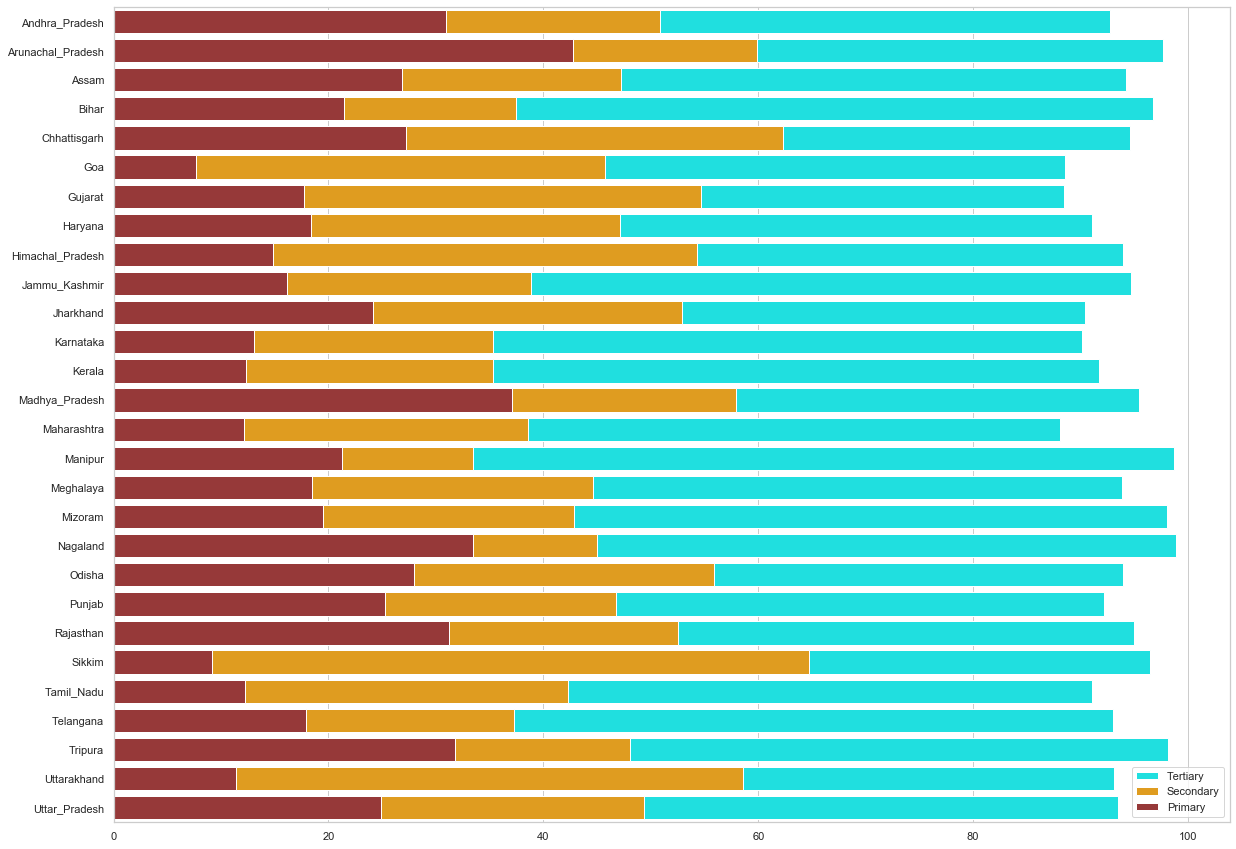

In [37]:
PST=Data1_B.loc[["Primary","Secondary","Tertiary","Gross State Domestic Product"]]
PST=PST.iloc[:,1:]  # Removing S.No. column
PST.isna().sum()   # Checking for null values
Primary=PST.loc["Primary"]/PST.loc["Gross State Domestic Product"]*100  # Finding the percentage for Primary
Secondary=PST.loc["Secondary"]/PST.loc["Gross State Domestic Product"]*100   # Finding the percentage for Secondary
Tertiary=PST.loc["Tertiary"]/PST.loc["Gross State Domestic Product"]*100   ## Finding the percentage for Tertiary

y = PST.keys()
sns.set(style="whitegrid")
bars = np.add(Primary, Secondary).tolist()
bars3 = np.add(bars, Tertiary).tolist()

plt.figure(figsize=(20,15)) # Increase the size of the figure
sns.barplot(x=bars3,y=y, color="cyan", label='Tertiary')
sns.barplot(x=bars, y=y,color="orange", label='Secondary')
sns.barplot(x=Primary,y=y,color="brown", label='Primary')
# plt.stackplot(PST.keys(), Primary, Secondary, Tertiary, colors=['blue', 'orange', 'brown'])

plt.legend()

plt.show()

### Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.

#### Which plot will you use here? Why?
I used stacked bar graph. Its easy to compare values across state and in one state using this graph. There is one pivot column and multiple values for this, suggestting stack plot

#### Why is (Primary + Secondary + Tertiary) not equal to total GDP?
Because taxes are collected on primary, secondary and tertiary and subsidies are provided by government. Since they are not equal so total GDP = Primay + Secondary + Tertiary + Taxes - Subsidy

### Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e., the states lying between the 85th and the 100th percentile are in C1; those between the 50th and the 85th percentiles are in C2, and so on.

In [38]:
q1=PerCapita.quantile(.85,axis=1)   #Assign the quantile values to q1
q2=PerCapita.quantile(.5,axis=1)   #Assign the quantile values to q2
q3=PerCapita.quantile(.2,axis=1)   #Assign the quantile values to q3
C1=PerCapita.loc[:,(PerCapita.loc[0] > q1[0])]
C2=PerCapita.loc[:,((PerCapita.loc[0] < q1[0]) & (PerCapita.loc[0]>q2[0]))]
C3=PerCapita.loc[:,((PerCapita.loc[0] < q2[0]) & (PerCapita.loc[0]>q3[0]))]
C4=PerCapita.loc[:,(PerCapita.loc[0] < q3[0])]

### Find the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc., not primary, secondary and tertiary) that contribute to approximately 80% of the GSDP of each category.

In [39]:
# Function to select only the sub sectors

def sector(n):
    sec=n
    df3= pd.DataFrame()
    new1=pd.DataFrame()
    df4=pd.DataFrame()
    for state in sec:
        new1=Data1_B.loc[["Agriculture, forestry and fishing","Mining and quarrying","Manufacturing","Electricity, gas, water supply & other utility services","Construction","Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting","Financial services","Real estate, ownership of dwelling & professional services","Public administration","Other services","Gross State Domestic Product"],state]
        df3=pd.concat([df4,new1], axis = 1)  #Concat the dfs to single df
        df4=df3
    return(df4)

def getCategorisePercent(Category, column):
    Category_Sector=sector(Category)
    Category_Sector[column]=Category_Sector.sum(axis=1)
    Category_SectorPercent=Category_Sector.loc[:,[column]]/Category_Sector.loc["Gross State Domestic Product",[column]]*100
    Category_SectorPercent.sort_values(by=column,ascending=False,inplace=True)
    Category_SectorPercent=Category_SectorPercent[1:]
    return Category_SectorPercent

C1_SectorPercent = getCategorisePercent(C1, 'C1')
C2_SectorPercent = getCategorisePercent(C2, 'C2')
C3_SectorPercent = getCategorisePercent(C3, 'C3')
C4_SectorPercent = getCategorisePercent(C4, 'C4')

subSectors=pd.concat([C1_SectorPercent,C2_SectorPercent,C3_SectorPercent,C4_SectorPercent],axis=1,sort=True)
#Transpose df
subSectors=subSectors.T
subSectors.sort_values(by=["C4","C1","C2","C3"],axis=1,ascending=False,inplace=True)
subSectors

,"Agriculture, forestry and fishing","Trade, repair, hotels and restaurants",Manufacturing,"Real estate, ownership of dwelling & professional services",Construction,"Transport, storage, communication & services related to broadcasting",Other services,Public administration,Financial services,Mining and quarrying,"Electricity, gas, water supply & other utility services"
C1,13.538762,13.322925,16.613203,13.181797,10.672368,6.675109,7.654629,3.513696,3.658299,0.705592,2.061199
C2,14.197645,10.232211,17.340648,15.364664,7.060643,6.062677,6.339883,3.241550,6.071087,1.864573,2.334707
C3,21.420049,10.270273,13.489416,9.721330,8.738575,5.811948,7.052936,5.227657,3.131925,6.933431,2.992366
C4,24.323490,11.783216,10.712459,10.365410,9.764521,6.941761,6.799089,5.781998,3.294504,2.613661,1.847900


#### C1:
* 3 - Trade, repair, hotels and restaurants
* 4 - Real estate, ownership of dwelling & professional services
* 5 - Construction

#### C2:
* 3 - Agriculture, forestry and fishing
* 4 - Trade, repair, hotels and restaurants
* 5 - Construction

#### C3:
* 3 - Trade, repair, hotels and restaurants
* 4 - Real estate, ownership of dwelling & professional services
* 5 - Construction

#### C4:
* 3 - Manufacturing
* 4 - Real estate, ownership of dwelling & professional services
* 5 - Construction

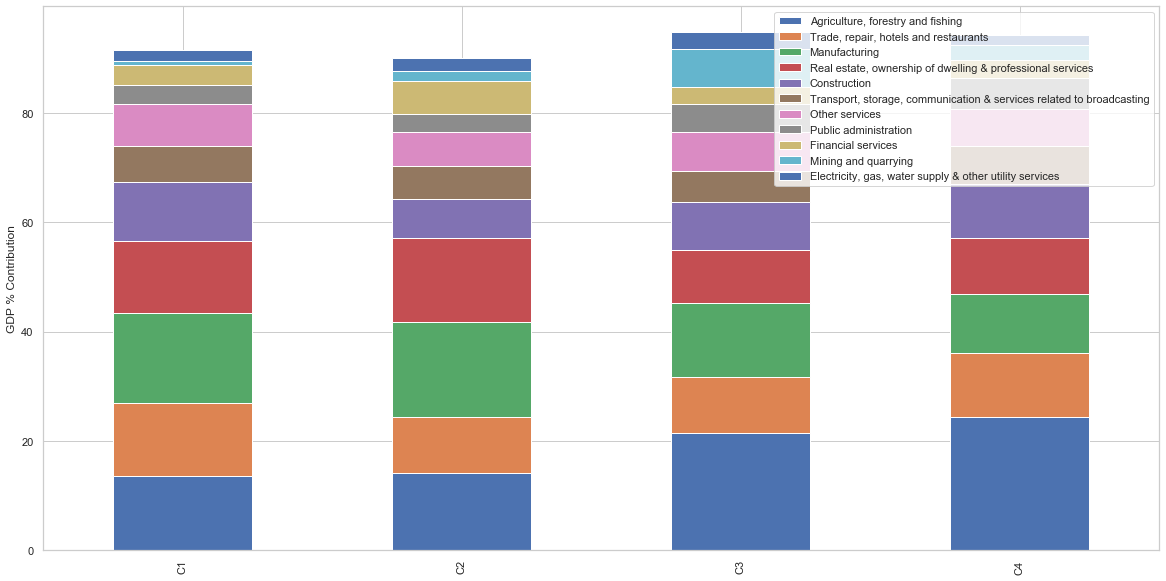

In [40]:
#Plot the contribution of the sub-sectors as a percentage of the GSDP of each category. 

subSectors.plot(kind="bar",stacked="True",figsize=(20,10),legend=False)
plt.ylabel("GDP % Contribution")
leg = plt.legend( loc = 'upper right')

### How does the GDP distribution of the top states (C1) differ from the others?
C1 states have equal proportion of 
* Agriculture, forestry and fishing	
* Trade, repair, hotels and restaurants	
* Manufacturing	
* Real estate, ownership of dwelling & professional services
with a little more focus manufacturing. As this distribution gets uneven states fall into C2/C3/C4. Lower categories have more focus on agriculture than manufacturing.

### Which sub-sectors seem to be correlated with high GDP?
* Manufacturing
* Agriculture, forestry and fishing 
* Real estate, ownership of dwelling & professional services
are sectors that affect GDP most

### Which sub-sectors do the various categories need to focus on? 
C2 needs to focus on Trade, repair, hotels and restaurants

C3 needs to focus on Trade, repair, hotels and restaurants, Real estate, ownership of dwelling & professional services and Construction 

C4 needs to focus on Real estate, ownership of dwelling & professional services and Construction

### Finally, provide at least two recommendations for each category to improve the per capita GDP
C1: It can work on having more agriculture and boosting real state sector further

C2: It can work on establishing tourism industry to focus more on trade, repair, hotels and restaurants. It can also have better public administration setup to achieve higher per capita GDP

C3: Like C2 it can also promote tourism to enhance many sectors. It also needs to focus on public infrastructure and construction by providing various loans/ other schemes on construction.

C4: It need to boost construction by providing loans/ reducing taxes/ increasing subsidies on construction. It will also boost Real estate.

# Part-II: GDP and Education

## Analyse if there is any correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for each state. Choose an appropriate plot to conduct this analysis.

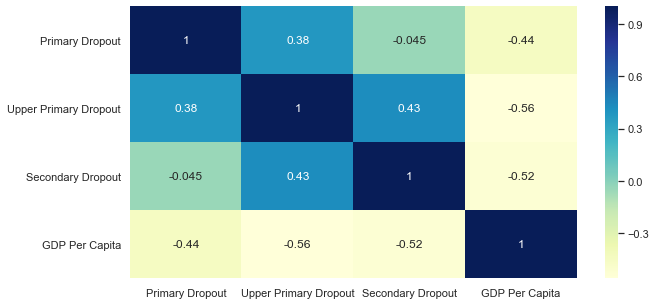

In [41]:
Dropouts=pd.read_csv("edudropouts.csv")
Dropouts=Dropouts[["Level of Education - State","Primary - 2014-2015","Upper Primary - 2014-2015","Secondary - 2014-2015"]]
Dropouts.set_index("Level of Education - State",inplace=True)

#Remove UTs
Dropouts.drop(["A & N Islands","Puducherry","Lakshadweep","Daman & Diu","Delhi","Dadra & Nagar Haveli","Chandigarh"],axis=0,inplace=True)
#Since there is no data availabe to compare with PerCapita dropping below:
Dropouts.drop(["West Bengal","All India"],axis=0,inplace=True)

PerCapita_T=PerCapita.T  #Transpose
PerCapita_T.columns=["GDP Per Capita"]  #Add column name
PerCapita_T.reset_index(inplace=True)
PerCapita_T.sort_index(by="index",axis=0,inplace=True)
PerCapita_T.set_index("index",inplace=True)

Dropouts_GDP=Dropouts.merge(PerCapita_T,how="inner", left_on=Dropouts.index, right_on="index")
Dropouts_GDP.rename(columns={"index":"State"},inplace=True)
Dropouts_GDP.rename(columns={"Primary - 2014-2015":"Primary Dropout"},inplace=True)
Dropouts_GDP.rename(columns={"Upper Primary - 2014-2015":"Upper Primary Dropout"},inplace=True)
Dropouts_GDP.rename(columns={"Secondary - 2014-2015":"Secondary Dropout"},inplace=True)
plt.rcParams["figure.figsize"] = (10,5)
cor =Dropouts_GDP.corr()
ax = sns.heatmap(cor, cmap="YlGnBu", annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

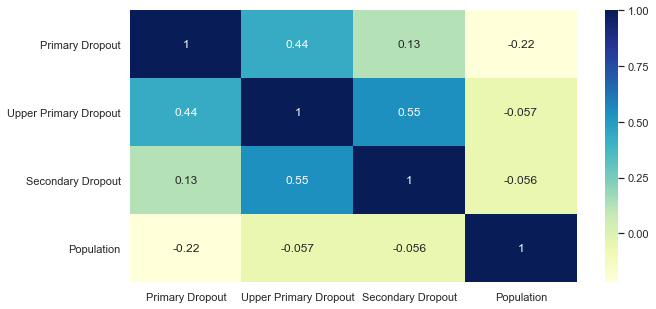

In [42]:
population = []
for index, row in Dropouts.iterrows():
    index = index.replace(' ', '_')
    if index == 'Chhatisgarh':
        index = 'Chhattisgarh'
    elif index == 'Jammu_and_Kashmir':
        index = 'Jammu_Kashmir'
    elif index== 'Uttrakhand':
        index = 'Uttarakhand'
    population.append(Data1_B[index.replace(' ', '_')][31])

Dropouts_Population=Dropouts.copy()
Dropouts_Population['Population'] = population
Dropouts_Population.rename(columns={"index":"State"},inplace=True)
Dropouts_Population.rename(columns={"Primary - 2014-2015":"Primary Dropout"},inplace=True)
Dropouts_Population.rename(columns={"Upper Primary - 2014-2015":"Upper Primary Dropout"},inplace=True)
Dropouts_Population.rename(columns={"Secondary - 2014-2015":"Secondary Dropout"},inplace=True)

corPopulation = Dropouts_Population.corr()
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.heatmap(corPopulation, cmap="YlGnBu", annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### You have the total population of each state from the data in part I. Is there any correlation between dropout rates and population? What is the expected trend and what is the observation?

Expected: There should not be any correlation between Dropout rate and population.

Observed: Upper Primary and Secondary Dropouts seems to be independent of population but there is some correlation between primary droput and population. With increse in population primary dropout decreases. It is not a strong correlation though.